In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
machine_cpu = fetch_openml(name="machine_cpu", version=1)
cpu_X, cpu_y = machine_cpu.data, machine_cpu.target
cpu_feature_names = machine_cpu.feature_names

cpu_df = pd.DataFrame(cpu_X, columns=cpu_feature_names)
cpu_df["performance"] = cpu_y

print(f"Kích thước dữ liệu: {cpu_df.shape}")
print(f"Các đặc trưng: {cpu_feature_names}")
print(f"Target: Performance (CPU Relative Performance)")

Kích thước dữ liệu: (209, 7)
Các đặc trưng: ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
Target: Performance (CPU Relative Performance)


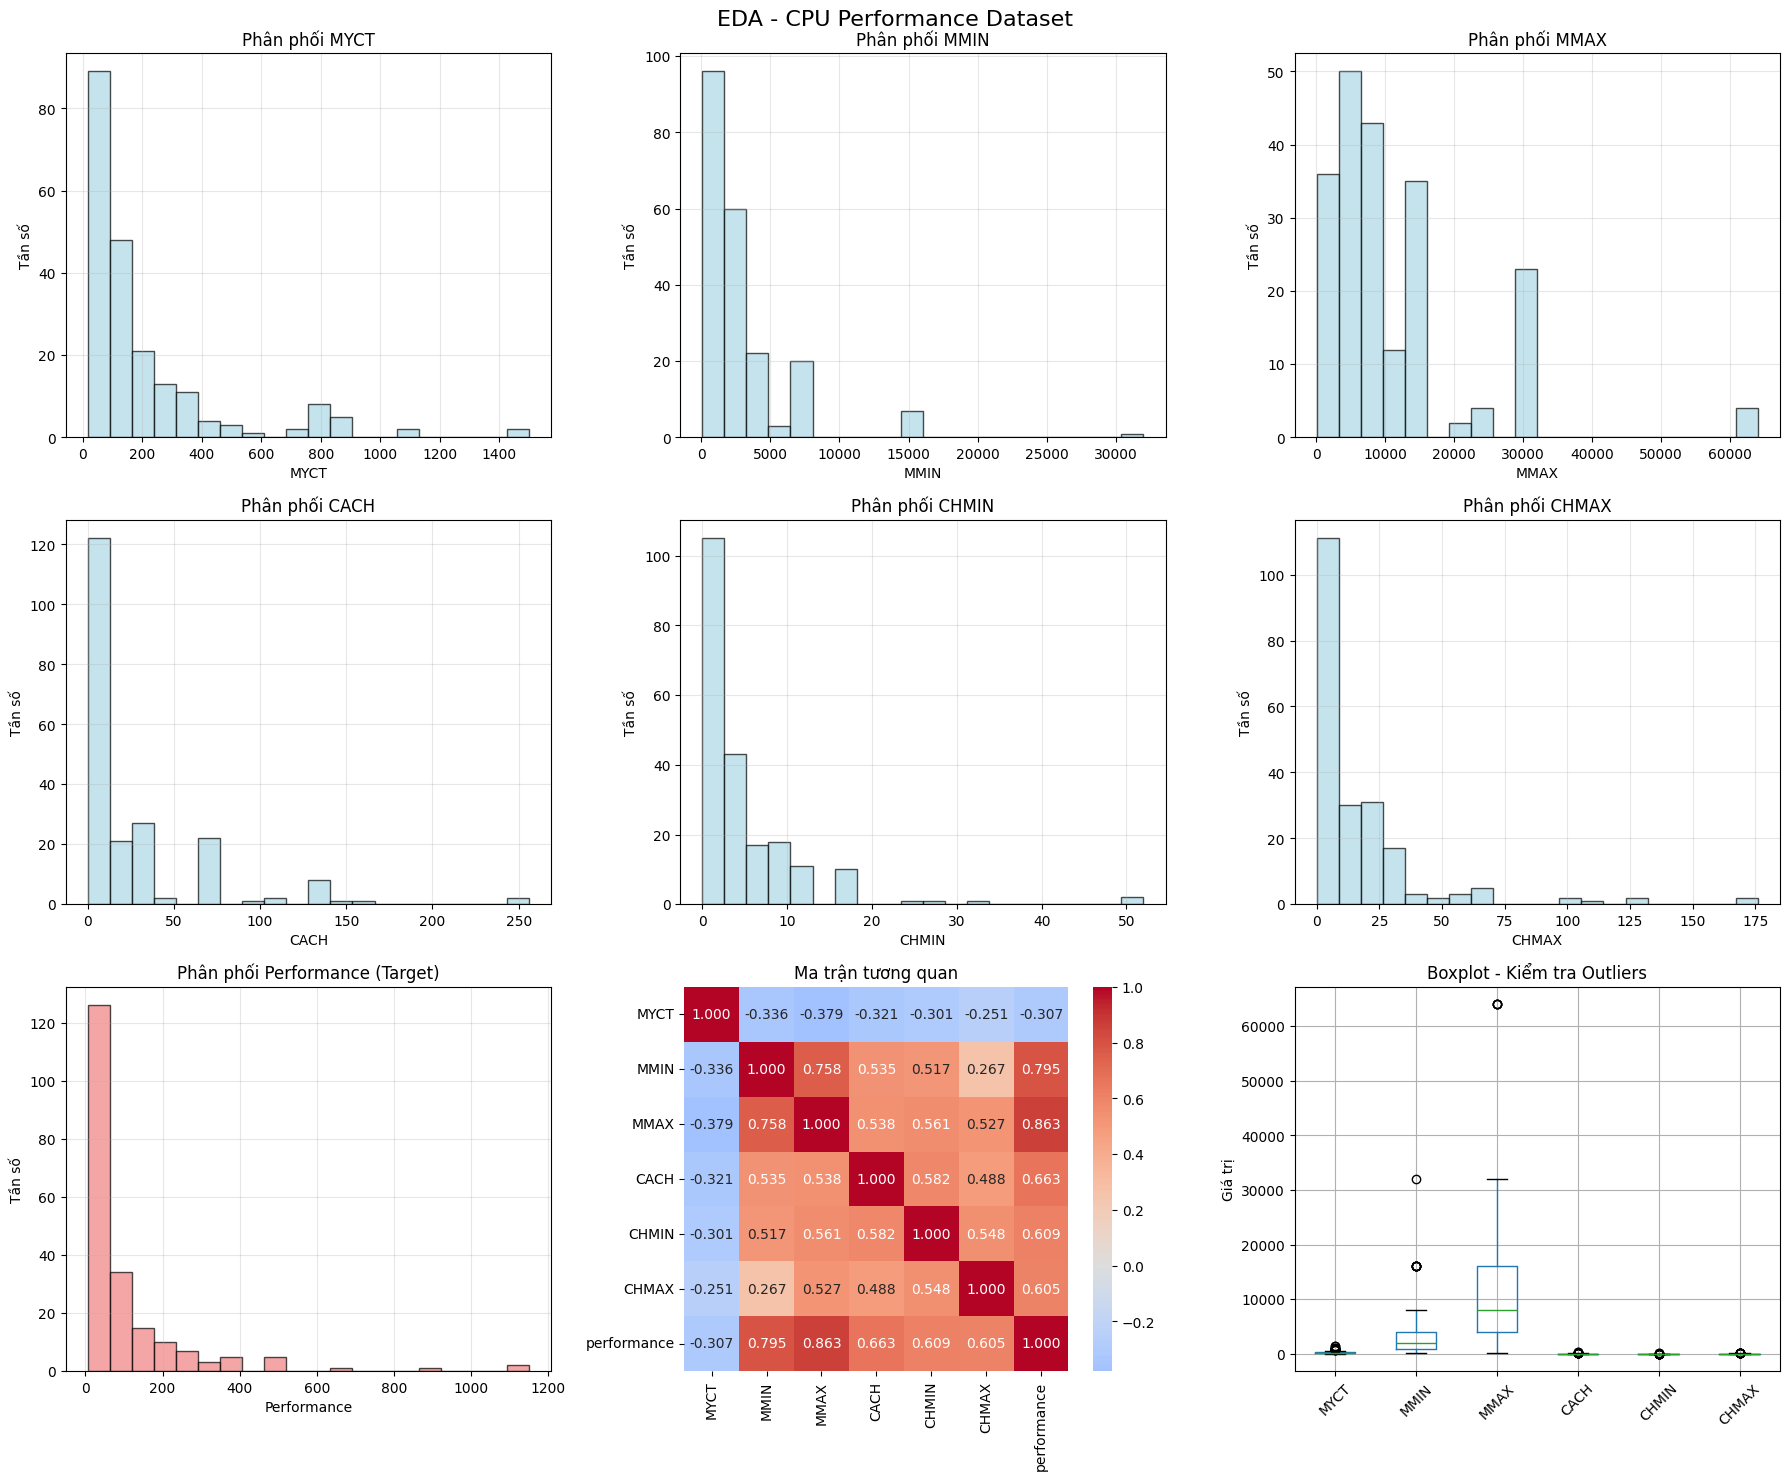

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()
# 1-6. Histogram của các đặc trưng
for i, col in enumerate(cpu_feature_names):
    axes[i].hist(cpu_df[col], bins=20, alpha=0.7, color="lightblue", edgecolor="black")
    axes[i].set_title(f"Phân phối {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Tần số", fontsize=10)
    axes[i].grid(True, alpha=0.3)

# 7. Histogram của target
axes[6].hist(cpu_df["performance"], bins=20, alpha=0.7, color="lightcoral", edgecolor="black")

axes[6].set_title("Phân phối Performance (Target)", fontsize=12)
axes[6].set_xlabel("Performance", fontsize=10)
axes[6].set_ylabel("Tần số", fontsize=10)
axes[6].grid(True, alpha=0.3)

# 8. Ma trận tương quan
correlation_matrix_cpu = cpu_df[cpu_feature_names + ["performance"]].corr()
sns.heatmap(correlation_matrix_cpu, annot=True, cmap="coolwarm", center=0,
square=True, ax=axes[7], fmt=".3f")
axes[7].set_title("Ma trận tương quan", fontsize=12)

# 9. Boxplot để kiểm tra outliers
cpu_df.boxplot(column=cpu_feature_names, ax=axes[8])
axes[8].set_title("Boxplot - Kiểm tra Outliers", fontsize=12)
axes[8].set_ylabel("Giá trị", fontsize=10)
axes[8].tick_params(axis="x", rotation=45)

plt.suptitle("EDA - CPU Performance Dataset", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

In [4]:
# Chia dữ liệu
X_train_cpu, X_test_cpu, y_train_cpu, y_test_cpu = train_test_split(cpu_X, cpu_y, test_size=0.2, random_state=42)
scaler_cpu = StandardScaler()
X_train_cpu_scaled = scaler_cpu.fit_transform(X_train_cpu)  
X_test_cpu_scaled = scaler_cpu.transform(X_test_cpu)

In [5]:
# Xây dựng mô hình Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_cpu, y_train_cpu)

# Dự đoán
y_pred_cpu = dt_regressor.predict(X_test_cpu)
# Đánh giá
mse = mean_squared_error(y_test_cpu, y_pred_cpu)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test_cpu - y_pred_cpu))
r2 = r2_score(y_test_cpu, y_pred_cpu)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")

MSE: 9295.4583
RMSE: 96.4130
MAE: 45.1786
R2: 0.8174
